# Projet Intelligence Artificielle

Groupe 4 :
- Zittel Laureline
- SEITZ Tom
- WALTER Loïc
- CHAMPY Hugo

## Éthique

Pour avoir en détail notre étude sur l'éthique vous pouvez allez voir notre autre document Jupyter Notebook nommé "Ethique".

Pour donner juste les données éthique à nos modèles veuillez changer la variable booléen éthique ci-dessous en True:

In [56]:
ethique = True

In [57]:
%pip install scikit-learn
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## Import des librairies

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, precision_recall_curve

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import SGDClassifier,Perceptron
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_predict, StratifiedShuffleSplit, GridSearchCV, RandomizedSearchCV

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import randint

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Import des CSVs

In [59]:
# fonction pour importer les CSVs
def data_loader(csv_path):
    return pd.read_csv(csv_path)

**Import de employee_survey_data.csv :**

In [60]:
employee_survey_df = data_loader(csv_path="./data/employee_survey_data.csv")
employee_survey_df

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0
...,...,...,...,...
4405,4406,4.0,1.0,3.0
4406,4407,4.0,4.0,3.0
4407,4408,1.0,3.0,3.0
4408,4409,4.0,1.0,3.0


**Import de general_data.csv :**

In [61]:
general_df = data_loader(csv_path="./data/general_data.csv")
general_df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


**Import de manager_survey_data.csv :**

In [62]:
if not ethique:
  manager_survey_df = data_loader(csv_path="./data/manager_survey_data.csv")
  manager_survey_df

**Import de in_time.csv :**

In [63]:
in_time_df = data_loader(csv_path="./data/in_time.csv")
in_time_df.rename(columns={"Unnamed: 0": "EmployeeID"}, inplace=True)
in_time_df.replace("NaN", pd.NA, inplace=True)
in_time_df.set_index('EmployeeID', inplace=True)
in_time_df.iloc[:, 1:] = in_time_df.iloc[:, 1:].apply(pd.to_datetime, errors='coerce')

in_time_df

C:\Users\tomst\AppData\Local\Temp\ipykernel_20124\2722087970.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'EmployeeID
1      NaT
2      NaT
3      NaT
4      NaT
5      NaT
        ..
4406   NaT
4407   NaT
4408   NaT
4409   NaT
4410   NaT
Name: 2015-01-14, Length: 4410, dtype: datetime64[ns]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  in_time_df.iloc[:, 1:] = in_time_df.iloc[:, 1:].apply(pd.to_datetime, errors='coerce')
C:\Users\tomst\AppData\Local\Temp\ipykernel_20124\2722087970.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'EmployeeID
1      NaT
2      NaT
3      NaT
4      NaT
5      NaT
        ..
4406   NaT
4407   NaT
4408   NaT
4409   NaT
4410   NaT
Name: 2015-01-26, Length: 4410, dtype: datetime64[ns]' has dtype incompatible with float64, please explicitly cast to a compatible dt

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaT,...,NaT,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaT,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaT,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,NaT,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaT,NaT,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,NaT,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaT,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,NaT,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaT,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,NaT,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaT,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,NaN,2015-01-02 09:20:32,2015-01-05 10:17:53,2015-01-06 10:26:51,2015-01-07 10:06:58,2015-01-08 09:45:06,2015-01-09 09:49:24,2015-01-12 09:37:10,2015-01-13 09:25:02,NaT,...,2015-12-18 10:01:06,2015-12-21 10:25:25,2015-12-22 10:16:11,2015-12-23 10:04:40,2015-12-24 09:45:40,NaT,2015-12-28 10:15:39,2015-12-29 10:10:09,2015-12-30 09:28:19,2015-12-31 10:00:12
4407,NaN,2015-01-02 10:03:41,NaT,2015-01-06 09:44:00,2015-01-07 09:42:10,2015-01-08 10:00:57,2015-01-09 09:44:04,2015-01-12 10:07:32,2015-01-13 10:05:11,NaT,...,2015-12-18 09:27:32,2015-12-21 09:41:24,2015-12-22 09:50:30,2015-12-23 10:32:21,2015-12-24 09:47:41,NaT,2015-12-28 09:54:23,2015-12-29 10:13:32,2015-12-30 10:21:09,2015-12-31 10:09:48
4408,NaN,2015-01-02 10:01:01,2015-01-05 09:33:00,2015-01-06 09:49:17,2015-01-07 10:28:12,2015-01-08 09:47:38,2015-01-09 10:01:03,2015-01-12 09:49:12,2015-01-13 09:47:10,NaT,...,2015-12-18 10:00:57,2015-12-21 09:51:07,2015-12-22 10:02:10,2015-12-23 09:58:29,2015-12-24 09:56:05,NaT,2015-12-28 09:59:24,NaT,2015-12-30 10:02:36,2015-12-31 10:03:30


**Import de out_time.csv :**

In [64]:
out_time_df = data_loader(csv_path="./data/out_time.csv")
out_time_df.rename(columns={"Unnamed: 0": "EmployeeID"}, inplace=True)
out_time_df.replace("NaN", pd.NA, inplace=True)
out_time_df.set_index('EmployeeID', inplace=True)
out_time_df.iloc[:, 1:] = out_time_df.iloc[:, 1:].apply(pd.to_datetime, errors='coerce')

out_time_df

C:\Users\tomst\AppData\Local\Temp\ipykernel_20124\3278753323.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'EmployeeID
1      NaT
2      NaT
3      NaT
4      NaT
5      NaT
        ..
4406   NaT
4407   NaT
4408   NaT
4409   NaT
4410   NaT
Name: 2015-01-14, Length: 4410, dtype: datetime64[ns]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  out_time_df.iloc[:, 1:] = out_time_df.iloc[:, 1:].apply(pd.to_datetime, errors='coerce')
C:\Users\tomst\AppData\Local\Temp\ipykernel_20124\3278753323.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'EmployeeID
1      NaT
2      NaT
3      NaT
4      NaT
5      NaT
        ..
4406   NaT
4407   NaT
4408   NaT
4409   NaT
4410   NaT
Name: 2015-01-26, Length: 4410, dtype: datetime64[ns]' has dtype incompatible with float64, please explicitly cast to a compatible 

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,NaT,...,NaT,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaT,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaT,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,NaT,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaT,NaT,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,NaT,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaT,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,NaT,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaT,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,NaT,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaT,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,NaN,2015-01-02 17:27:37,2015-01-05 19:08:20,2015-01-06 18:50:49,2015-01-07 18:57:40,2015-01-08 17:58:31,2015-01-09 18:06:15,2015-01-12 17:58:48,2015-01-13 18:10:35,NaT,...,2015-12-18 18:06:05,2015-12-21 18:35:06,2015-12-22 18:33:44,2015-12-23 18:40:56,2015-12-24 18:21:29,NaT,2015-12-28 18:44:35,2015-12-29 19:14:38,2015-12-30 18:24:56,2015-12-31 18:30:41
4407,NaN,2015-01-02 16:19:01,NaT,2015-01-06 15:07:37,2015-01-07 15:25:50,2015-01-08 16:12:33,2015-01-09 15:26:56,2015-01-12 16:10:42,2015-01-13 16:22:43,NaT,...,2015-12-18 15:23:02,2015-12-21 15:31:14,2015-12-22 15:45:59,2015-12-23 16:38:59,2015-12-24 15:47:15,NaT,2015-12-28 15:34:34,2015-12-29 16:47:02,2015-12-30 16:03:17,2015-12-31 16:18:39
4408,NaN,2015-01-02 17:17:35,2015-01-05 17:08:07,2015-01-06 17:27:46,2015-01-07 18:27:22,2015-01-08 17:05:25,2015-01-09 17:02:57,2015-01-12 17:35:45,2015-01-13 17:15:52,NaT,...,2015-12-18 17:48:05,2015-12-21 17:43:05,2015-12-22 17:47:23,2015-12-23 17:43:37,2015-12-24 17:20:12,NaT,2015-12-28 17:43:28,NaT,2015-12-30 17:48:14,2015-12-31 18:08:55


In [65]:
time_diff_df = out_time_df - in_time_df
time_diff_df.replace("NaT", pd.NA, inplace=True)
# print(timeDiffDf.info())

timedelta_columns = time_diff_df.iloc[:, 1:]  # Adjust column selection as necessary

seconds_diff_df = timedelta_columns.applymap(lambda x: x.total_seconds() if pd.notnull(x) else np.nan)
#print(seconds_diff_df.head())
# Compute the mean ignoring NaN across columns for each row
average_seconds = seconds_diff_df.mean(axis=1)
# Convert the average seconds back to a timedelta
average_timedelta = pd.to_timedelta(average_seconds, unit='s')

# If you want to associate these average times back with their respective EmployeeID
average_timedelta_with_id = pd.concat([average_timedelta], axis=1)
average_timedelta_with_id.columns = ['AverageTimeSpent']

# Now average_timedelta_with_id should be a DataFrame where:
# - The 'EmployeeID' column retains the original IDs
# - The 'AverageTimeSpent' column holds the calculated average timedelta per employee
# print(average_timedelta_with_id.head())

average_timedelta_with_id["AverageTimeSpent"] = average_timedelta_with_id["AverageTimeSpent"].dt.total_seconds().floordiv(3600).astype(int)
#average_timedelta_with_id

#group by <7 hours, 7-9 hours, >0 hours
bins = [0, 7, 9, 24]
labels = ['<7h', '7-9h', '>9h']
average_timedelta_with_id['AverageTimeSpent'] = pd.cut(average_timedelta_with_id['AverageTimeSpent'], bins=bins, labels=labels)

#transform index to column
average_timedelta_with_id.reset_index(level=0, inplace=True)
average_timedelta_with_id

C:\Users\tomst\AppData\Local\Temp\ipykernel_20124\3605299926.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  seconds_diff_df = timedelta_columns.applymap(lambda x: x.total_seconds() if pd.notnull(x) else np.nan)


,EmployeeID,AverageTimeSpent
0,1,<7h
1,2,<7h
2,3,<7h
3,4,<7h
4,5,7-9h
...,...,...
4405,4406,7-9h
4406,4407,<7h
4407,4408,<7h
4408,4409,7-9h


## Regroupement des données

Pour la suite, nous regroupons les données en un seul DataFrame pour faciliter leur manipulation.

In [66]:
merged_df = pd.merge(employee_survey_df, general_df, on='EmployeeID')

if ethique is False:
  merged_df = pd.merge(merged_df, manager_survey_df, on='EmployeeID')

merged_df = pd.merge(merged_df, average_timedelta_with_id, on='EmployeeID')

merged_df.head()


,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,AverageTimeSpent
0,1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,...,Y,11,8,0,1.0,6,1,0,0,<7h
1,2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,...,Y,23,8,1,6.0,3,5,1,4,<7h
2,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,...,Y,15,8,3,5.0,2,5,0,3,<7h
3,4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,...,Y,11,8,3,13.0,5,8,7,5,<7h
4,5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,...,Y,12,8,2,9.0,2,6,0,4,7-9h


Nous affichons les informations de ce DataFrame afin de savoir à quels types de données nous avons affaire.

In [67]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   EmployeeID               4410 non-null   int64   
 1   EnvironmentSatisfaction  4385 non-null   float64 
 2   JobSatisfaction          4390 non-null   float64 
 3   WorkLifeBalance          4372 non-null   float64 
 4   Age                      4410 non-null   int64   
 5   Attrition                4410 non-null   object  
 6   BusinessTravel           4410 non-null   object  
 7   Department               4410 non-null   object  
 8   DistanceFromHome         4410 non-null   int64   
 9   Education                4410 non-null   int64   
 10  EducationField           4410 non-null   object  
 11  EmployeeCount            4410 non-null   int64   
 12  Gender                   4410 non-null   object  
 13  JobLevel                 4410 non-null   int64   
 14  JobRole 

## Suppression des colonnes inutiles et anéthiques

On va supprimer les colonnes redondantes, inutiles et anéthiques pour notre étude.

EmployeeCount : Toutes les valeurs sont à 1, donc la donnée est inutile.
Over18 : Nous avons l'age de chaque employé, donc la donnée est redondante.
StandardHours : Toutes les valeurs sont à 8h, donc la donnée est inutile.
EmployeeId : La colonne est utile pour regrouper les données, mais n'est pas utile pour notre étude.

En ce qu'il est de l'éthique, nous avons décidé de ne pas utiliser DistanceFromHome, EducationField, Gender et MaritalStatus car elles sont soit trop personnelles, soit discriminatoires. Pour plus d'informations, voir notre livrable éthique.

In [68]:
merged_df.drop(['EmployeeCount'], axis=1, inplace=True)
merged_df.drop(['Over18'], axis=1, inplace=True)
merged_df.drop(['StandardHours'], axis=1, inplace=True)
merged_df.drop(['EmployeeID'], axis=1, inplace=True)

if ethique is True:
  merged_df.drop(['DistanceFromHome'], axis=1, inplace=True)
  merged_df.drop(['EducationField'], axis=1, inplace=True)
  merged_df.drop(['Gender'], axis=1, inplace=True)
  merged_df.drop(['MaritalStatus'], axis=1, inplace=True)

merged_df.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,Education,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,AverageTimeSpent
0,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,2,1,Healthcare Representative,131160,1.0,11,0,1.0,6,1,0,0,<7h
1,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,1,1,Research Scientist,41890,0.0,23,1,6.0,3,5,1,4,<7h
2,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,4,4,Sales Executive,193280,1.0,15,3,5.0,2,5,0,3,<7h
3,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,5,3,Human Resources,83210,3.0,11,3,13.0,5,8,7,5,<7h
4,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,1,1,Sales Executive,23420,4.0,12,2,9.0,2,6,0,4,7-9h


## Remappage des données

In [69]:
# remplacement des strings par des entiers
merged_df['Attrition'] = merged_df['Attrition'].map({'Yes': 1, 'No': 0})

if ethique is False:
  merged_df['Gender'] = merged_df['Gender'].map({'Female': 0, 'Male': 1})

# regrouper par classe de salaire en 6 groupes de 0 à 200000
merged_df['MonthlyIncome'] = pd.cut(merged_df['MonthlyIncome'], bins=[0, 33333, 66666, 100000, 133333, 166666, 200000], labels=[0, 1, 2, 3, 4, 5])
merged_df.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,Education,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,AverageTimeSpent
0,3.0,4.0,2.0,51,0,Travel_Rarely,Sales,2,1,Healthcare Representative,3,1.0,11,0,1.0,6,1,0,0,<7h
1,3.0,2.0,4.0,31,1,Travel_Frequently,Research & Development,1,1,Research Scientist,1,0.0,23,1,6.0,3,5,1,4,<7h
2,2.0,2.0,1.0,32,0,Travel_Frequently,Research & Development,4,4,Sales Executive,5,1.0,15,3,5.0,2,5,0,3,<7h
3,4.0,4.0,3.0,38,0,Non-Travel,Research & Development,5,3,Human Resources,2,3.0,11,3,13.0,5,8,7,5,<7h
4,4.0,1.0,3.0,32,0,Travel_Rarely,Research & Development,1,1,Sales Executive,0,4.0,12,2,9.0,2,6,0,4,7-9h


## Dendrogramme

In [70]:
# dendro_df = merged_df.copy()
# dendro_df['Attrition'] = dendro_df['Attrition'].map({'Yes': 1, 'No': 0})
# dendro_df.drop(['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus'], axis=1, inplace=True)

# median = dendro_df["EnvironmentSatisfaction"].median()
# dendro_df["EnvironmentSatisfaction"].fillna(median, inplace=True)

# median = dendro_df["JobSatisfaction"].median()
# dendro_df["JobSatisfaction"].fillna(median, inplace=True)

# median = dendro_df["WorkLifeBalance"].median()
# dendro_df["WorkLifeBalance"].fillna(median, inplace=True)

# median = dendro_df["NumCompaniesWorked"].median()
# dendro_df["NumCompaniesWorked"].fillna(median, inplace=True)

# median = dendro_df["TotalWorkingYears"].median()
# dendro_df["TotalWorkingYears"].fillna(median, inplace=True)

# dendro_df.info()
# dendrogram(linkage(dendro_df, method='ward'), orientation='top', distance_sort='descending', show_leaf_counts=True)


In [71]:
# for category in merged_df.columns:
#     # Getting counts for both attrition and non-attrition by the current category
#     attrition_counts = merged_df.groupby([category, 'Attrition']).size().unstack(fill_value=0)

#     # Calculate percentages
#     total = attrition_counts.sum(axis=1) # Total counts (attrition + non-attrition) for each category
#     percentages = attrition_counts.div(total, axis=0) * 100 # Calculate the percentages
    
#     # Plotting
#     ax = percentages.plot(kind='bar', figsize=(10, 6), title=f'Percentage of Attrition and Non-Attrition by {category}', stacked=False)
    
#     plt.xlabel(category)
#     plt.ylabel('Percentage')
    
#     # Annotate each bar with its percentage value for both Attrition and Non-Attrition
#     for p in ax.patches:
#         annotation = "{:.1f}%".format(p.get_height())
#         ax.annotate(annotation, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

#     plt.ylim(0, 100)  # Adjust the y-axis to show percentages clearly
#     plt.show()
#     

## Matrice de corrélation

A présent, nous cherchons à connaitre les données qui sont corrélées entre elles.

En effet, des paramètres inter-dépendants peuvent entrainer un mauvais entrainement du modèle, et donc fausser les résultats en sortie. 

Une fois les données corrélées repérées, nous pourrons choisir de supprimer certaines colonnes afin d'avoir uniquement des paramètres indépendants en entrée du modèle.

Text(0.5, 1.0, 'Correlation Matrix')

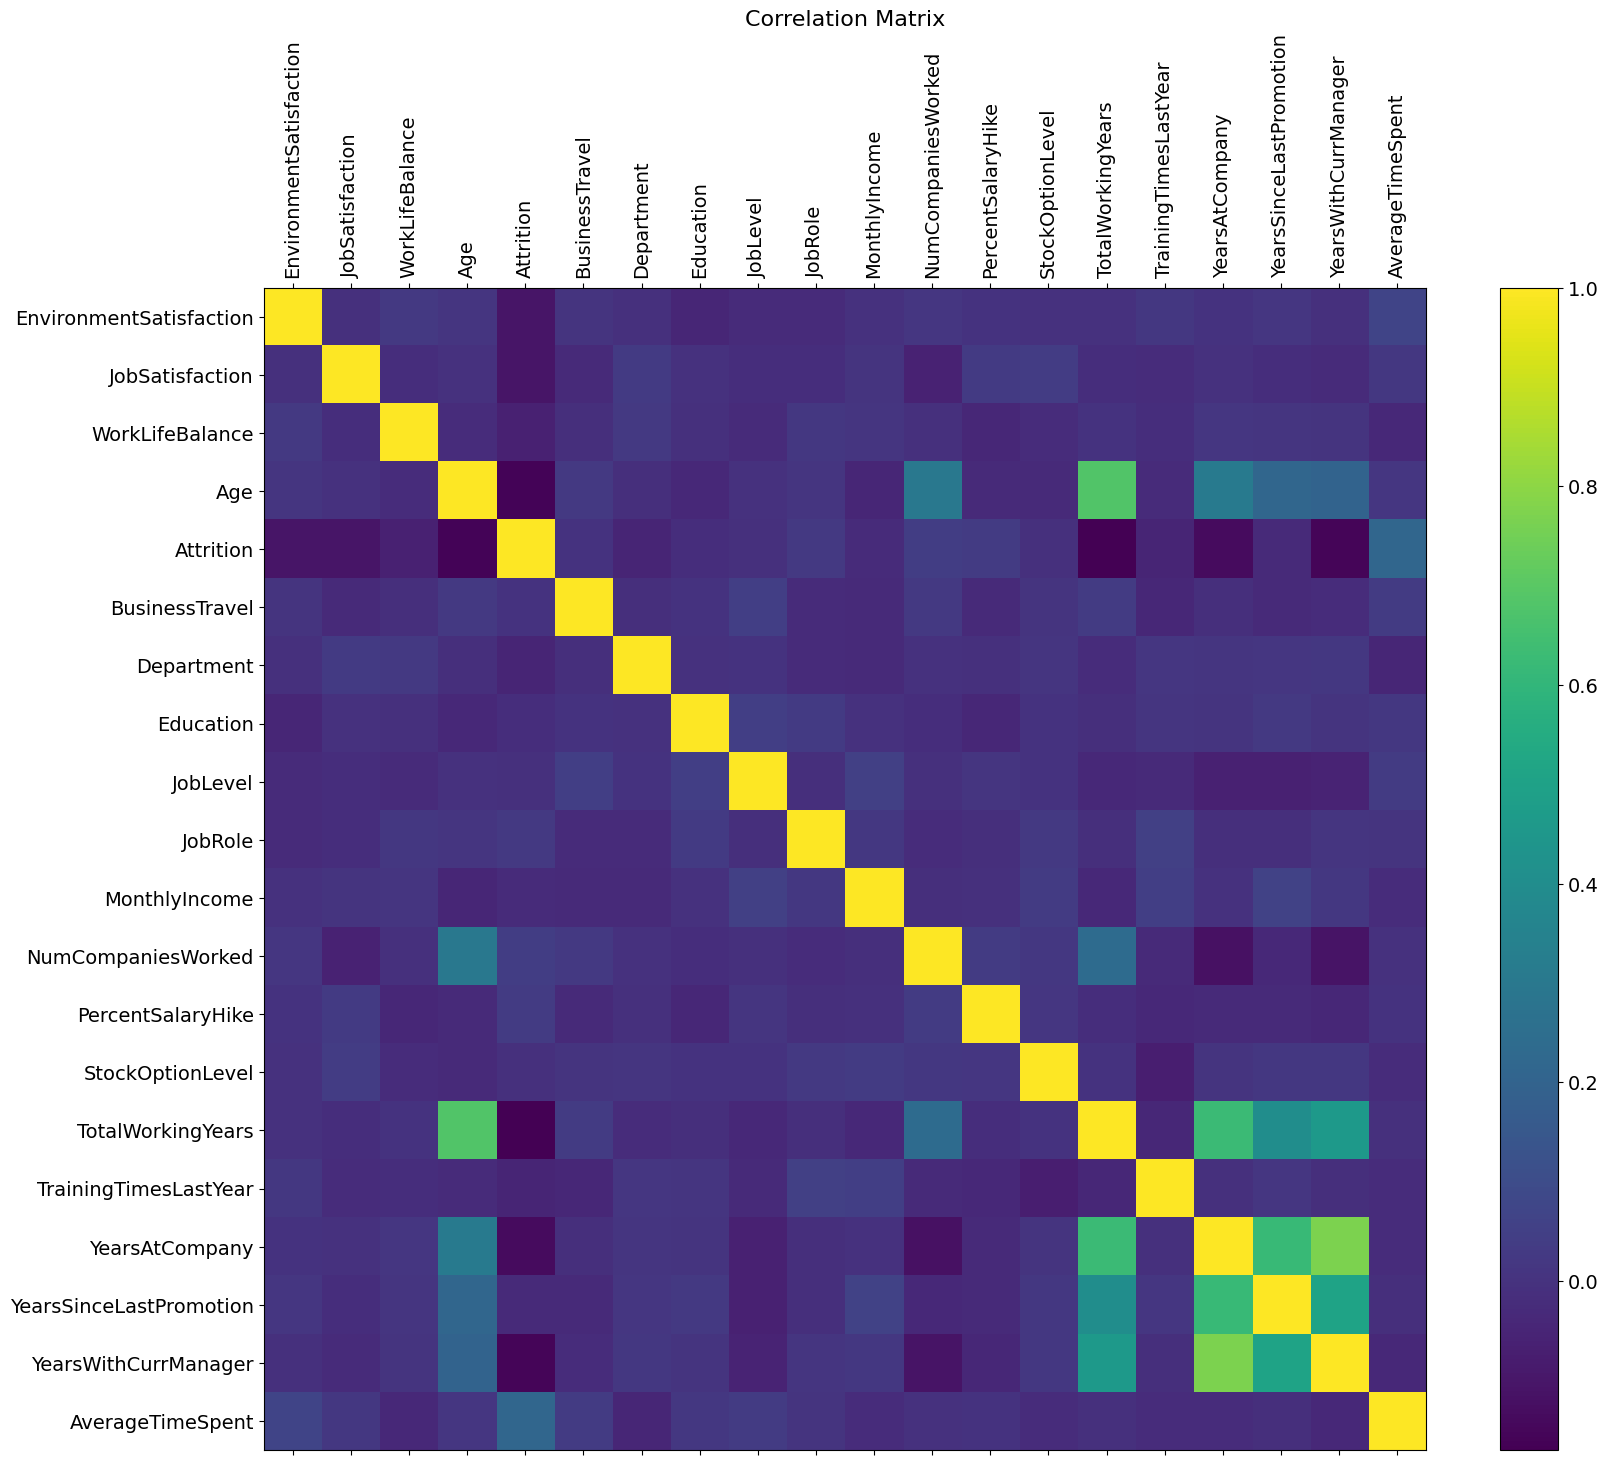

In [72]:
# Copy dataframe to avoid modifying the original dataframe
plotting_df = merged_df.copy()

# Replace category with numerical values just for plotting
plotting_df['BusinessTravel'] = plotting_df['BusinessTravel'].astype('category').cat.codes
plotting_df['Department'] = plotting_df['Department'].astype('category').cat.codes
plotting_df['JobRole'] = plotting_df['JobRole'].astype('category').cat.codes
plotting_df['AverageTimeSpent'] = plotting_df['AverageTimeSpent'].astype('category').cat.codes

if ethique is False:
  plotting_df['EducationField'] = plotting_df['EducationField'].astype('category').cat.codes
  plotting_df['MaritalStatus'] = plotting_df['MaritalStatus'].astype('category').cat.codes
  

# Calculate the correlation matrix
corr = plotting_df.corr()

f = plt.figure(figsize=(19, 15))
plt.matshow(corr, fignum=f.number)

# show axis label for each line and column
plt.xticks(range(plotting_df.shape[1]), plotting_df.columns, fontsize=14, rotation=90)
plt.yticks(range(plotting_df.shape[1]), plotting_df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)


On constate que certaines données sont **très corrélées entre elles**. Nous allons donc devoir faire un choix sur les colonnes à garder.

Nous avons dévider de **supprimer** les colonnes suivantes:
- ***YearsAtCompany*** : corrélé avec TotalWorkingYears, YearsSinceLastPromotion, YearsWithCurrManager. Nous souhaitons garder YearsWithCurrManager qui nous emble être un indicateur important pour prédire le départ d'un employé. Nous devons donc supprimer YearsAtCompany afins de ne pas avoir de données corrélées.
- ***TotalWorkingYears*** : corrélé avec Age, YearsWithCurrManager, YearsSinceLastPromotion, YearsAtCompany. Nous avons choisi de garder Age, car c'est une donnée qui nous semble plus intéressante à garder.
- ***YearsSinceLastPromotion*** : corrélé avec YearsWithCurrManager, YearsAtCompany, TotalWorkingYears. Nous avons supprimé YearsSinceLastPromotion car nous avons constaté sur les graphiques que nous affichons précédamment que les personnes qui ont tendances à partir le plus, sont celles qui ont un nouveau manager depuis peu. Alors que les personnes qui ont un même manager depuis longtemps ont tendance à rester.
- ***PerformanceRating*** : corrélé avec PercentSalaryHike. Nous avons choisi de garder PercentSalaryHike, étant donné que cette donnée est précise et factuelle, tandis que PerformanceRating une note donnée par le manager, et donc subjective.

In [73]:
# Drop columns with correlation
merged_df.drop(['YearsAtCompany'], axis=1, inplace=True)
merged_df.drop(['YearsSinceLastPromotion'], axis=1, inplace=True)
merged_df.drop(['TotalWorkingYears'], axis=1, inplace=True)

if not ethique:
  merged_df.drop(['PerformanceRating'], axis=1, inplace=True)

## Gestion des données manquantes

Maintenant que nous avons supprimé les colonnes corrélées, il ne nous reste uniquement les données qui nous intéressent.

Nous allons donc continuer en corrigeant les données manquantes. Nous allons remplir les données manquantes avec la médiane des données, qui possède le plus de chance de ne pas fausser les résultats.

In [74]:
# This code shows the process of imputing missing values in the numeric columns. It will be implemented in the transformation pipeline later.

# Create an instance of the SimpleImputer class
imputer = SimpleImputer(strategy='median')

# Fit the imputer to the numeric columns
num_data = merged_df.select_dtypes(include=np.number)
imputer.fit(num_data)

# Transform and replace the numeric columns
num_data_trans = imputer.transform(num_data)
df_num_trans = pd.DataFrame(data=num_data_trans, columns=num_data.columns)
#print(df_num_trans)

df_cat_data = merged_df.drop(num_data.columns, axis=1)
#print(df_cat_data)

df_corrected = pd.concat([df_num_trans, df_cat_data], axis=1)

df_corrected


,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,Education,JobLevel,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsWithCurrManager,BusinessTravel,Department,JobRole,MonthlyIncome,AverageTimeSpent
0,3.0,4.0,2.0,51.0,0.0,2.0,1.0,1.0,11.0,0.0,6.0,0.0,Travel_Rarely,Sales,Healthcare Representative,3,<7h
1,3.0,2.0,4.0,31.0,1.0,1.0,1.0,0.0,23.0,1.0,3.0,4.0,Travel_Frequently,Research & Development,Research Scientist,1,<7h
2,2.0,2.0,1.0,32.0,0.0,4.0,4.0,1.0,15.0,3.0,2.0,3.0,Travel_Frequently,Research & Development,Sales Executive,5,<7h
3,4.0,4.0,3.0,38.0,0.0,5.0,3.0,3.0,11.0,3.0,5.0,5.0,Non-Travel,Research & Development,Human Resources,2,<7h
4,4.0,1.0,3.0,32.0,0.0,1.0,1.0,4.0,12.0,2.0,2.0,4.0,Travel_Rarely,Research & Development,Sales Executive,0,7-9h
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4.0,1.0,3.0,42.0,0.0,4.0,1.0,3.0,17.0,1.0,5.0,2.0,Travel_Rarely,Research & Development,Research Scientist,1,7-9h
4406,4.0,4.0,3.0,29.0,0.0,4.0,1.0,2.0,15.0,0.0,2.0,2.0,Travel_Rarely,Research & Development,Laboratory Technician,0,<7h
4407,1.0,3.0,3.0,25.0,0.0,2.0,2.0,0.0,20.0,0.0,4.0,2.0,Travel_Rarely,Research & Development,Sales Executive,1,<7h
4408,4.0,1.0,3.0,42.0,0.0,2.0,1.0,0.0,14.0,1.0,2.0,8.0,Travel_Rarely,Sales,Laboratory Technician,0,7-9h


## Split

Nous allons maintenant séparer les données en deux groupes : les données d'entrainement et les données de test.
De cette façon, nous pourrons entrainer notre modèle sur les données d'entrainement, et le valider sur les données de test.

Nous séparons les données en 80% pour l'entrainement et 20% pour le test.

Les données sont séparée en respectant la proportion de départ de la colonne *WorkLifeBalance* dans chaque groupe. Nous avons choisi cette colonne car elle nous semble être un bon indicateur pour prédire le départ d'un employé.

In [75]:
# Splitting the data into training and testing sets
# Stratified sampling based on the 'WorkLifeBalance' column
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_corrected, df_corrected['WorkLifeBalance']):
    print(train_index, test_index)
    df_train_set = df_corrected.loc[train_index]
    df_test_set = df_corrected.loc[test_index]


[3653  124 4383 ...  891   24 2283] [3751 3478 2266  262 1674 2410 4356 2823  387 1553 2481 2278 3253   90
 1623  663 4402 2123 3869 4149  537 3370 2734 4218 3760 3777 1194 3504
 3428 3035 2025 4119 1759 2716 3291 1607  739 3321  469 3501 1317  492
 3846 1302  844 3626  125 2477 3438 1843 1570    7 2268 1710 4069  260
 2547 3116 1527 1128 1956 2327  777 2565 4247 2127  859 3703 2483 1928
 2390 3830 2157 1007 1503  234  181  372 3987 1971 1608  331 3823 2720
 3182 3103 2870 3072 1500 2146 1360 2015  241  127  162 1609 4175 2537
 3423 2290 3169  351  690 2673 1797  862 4391 1245 1604 4404 4250  955
 2294 1529 4108  806 2835  649  196 4114 3677 2635 1345 3130 2971  907
 2617  771  529 1976  441 4253 3301 2307 2095 3274  575   62 1935 3399
  584  642  572 3261 3166 1293 1466 1272 2878  731  349 3655 3537 3113
 3333  202 1563 2239 2093 2462 1201 1904 2341  498 3791 1454 1968 4203
 3184 2772 1365 2359 3709 1464 2179  664 2067  157 4240 2768   40  790
  225 2020 3897   63 2542 1846 3605 4057 

Nous gardons également les données de la colonne *Attrition* dans un dataframe à part, puisque c'est la colonne que nous souhaitons prédire à partir des autres données.

In [76]:
X_train = df_train_set.drop(['Attrition'], axis=1)
y_train = df_train_set['Attrition'].copy()
X_test = df_test_set.drop(['Attrition'], axis=1)
y_test = df_test_set['Attrition'].copy()

y_train_1 = (y_train == 1)
y_test_1 = (y_test == 1)

## Pipeline

Nous allons maintenant créer un pipeline de transformation pour préparer les données à être entrainées par un modèle.

Nous créons une premier pipeline pour les données numériques, et un deuxième pour les données catégorielles, qui inclu le premier pipeline.

In [77]:
# Numerical Pipeline
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

In [78]:
# Categorical Pipeline
num_attribs = X_train.select_dtypes(include=np.number).columns
cat_attribs = X_train.select_dtypes(include=['object', 'category']).columns

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

# Dataframe prepared with the full pipeline, ready for the model
X_train_prepared = full_pipeline.fit_transform(X_train)

## 1er modèle : Random Forest

Nous allons maintenant entrainer un premier modèle sur les données d'entrainement.

Le Random Forest (qui signifie *forêt aléatoire*) est un **ensemble d'arbres de décision** utilisés pour prédire une quantité ou une probabilité.

### Arbre de décision

Un arbre de décision (binaire) est une structure descendante qui possède des nœuds et des branches. À chaque nœud, une condition va nous permettre de nous diriger dans l'arbre, jusqu'à arriver à la fin (nœud terminal).

Chaque nœuds représente une caractéristique de notre ensemble de données. Avec ce processus, les données sont organisées sous forme d'arborescence.

Ainsi, pour prédire une valeur, nous allons suivre le chemin de l'arbre en fonction des caractéristiques de notre donnée d'entrée.

Au final, nous arrivons à un nœud terminal qui nous donne une prédiction.


### Application dans le Random Forest :

Par définition, un Random Forest a besoin de trois hyper-paramètres principaux (paramètres fixes), qui doivent être définis avant l’entraînement. Il s’agit notamment de la **profondeur maximale de chaque arbre** (*max_depth*, le nombre de nœuds maximal), du **nombre d’arbres** à utiliser (*n_estimators*) et le **nombre de caractéristiques échantillonnées** (*max_features*, nombre de variables aléatoires choisies à chaque mélange depuis les variables explicatives).

Le processus du Random Forest est le suivant :

1. **Sélection aléatoire des données** : On applique le principre du **bagging**, c'est-à-dire créer de nombreux sous-échantillons aléatoires de notre ensemble de données avec possibilité de sélectionner la même valeur plusieurs fois.

2. **Construction des arbres de décision** : Chaque arbre est entraîné sur une portion aléatoire afin de recréer une prédiction. Ces modèles-là sont très peu corrélés, et chaque arbre de décision fonctionne individuellement et indépendamment des autres.

3.  **Prédiction** : Pour prédire une valeur finale, chaque arbre de décision va donner une prédiction. Dans notre cas, qui est la classification binaire, nous allons prendre la prédiction majoritaire.

In [79]:
# Random Forest model
forest_clf = RandomForestClassifier(random_state=42, n_estimators=10)

#Cross-Validation
forest_scores = cross_val_predict(forest_clf, X_train_prepared, y_train_1, cv=10)


### Matrice de confusion

Nous vérifions la qualité du modèle en utilisant une matrice de confusion.

Celle-ci nous donne des informations sur les erreurs de prédiction du modèle.

Nous utiliserons les indicaeurs suivants pour évaluer la qualité du modèle:
- **Precision** : Correspond à la proportion de nombre de vrai positif par rapport au nombre de positif total prédit par le modèle.

$$
\text{Precision} = \frac{\text{VP}}{\text{VP} + \text{FP}}
$$

- **Recall** : Correspond à la proportion de nombre de vrai positif par rapport au nombre de positif total réel.

$$
\text{Recall} = \frac{\text{VP}}{\text{VP} + \text{FN}}
$$

- **F1-score** : Correspond à la moyenne harmonique de la precision et du recall.

$$
\text{F1-score} = 2 \times \frac{\text{Précision} \times \text{Recall}}{\text{Précision} + \text{Recall}}
$$

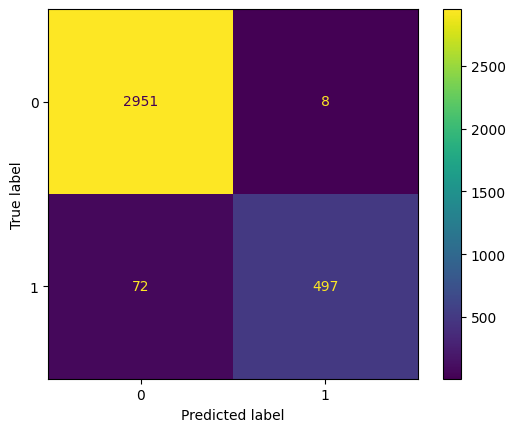

In [80]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_train_1, forest_scores)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()



In [81]:
# Precision, Recall and F1 Score
forest_precision = precision_score(y_train_1, forest_scores)
forest_recall = recall_score(y_train_1, forest_scores)
forest_f1 = f1_score(y_train_1, forest_scores)

print(f'Precision: {forest_precision}')
print(f'Recall: {forest_recall}')
print(f'F1 Score: {forest_f1}')

Precision: 0.9841584158415841
Recall: 0.8734622144112478
F1 Score: 0.925512104283054


In [82]:
y_probas_forest = cross_val_predict(forest_clf, X_train_prepared, y_train_1, cv=10, method="predict_proba")
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class

precisions, recalls, thresholds = precision_recall_curve(y_train_1, y_scores_forest)

A présent nous allant afficher la courbe de précision et la courbe de rappel en fonction du seuil de décision afin d'évaluer la performance du modèle. Ce graphique nous permettra de voir comment la précision et le rappel évoluent individuellement à mesure que le seuil de décision change. L'axe des X représente le seuil de décision. Il varie généralement de 0 à 1. L'axe des Y représente soit la valeur de précision, soit celle du rappel, selon la courbe que vous regardez. Cette courbe est particulièrement utile pour identifier un seuil de décision qui équilibre de manière optimale les exigences spécifiques en matière de précision et de rappel.

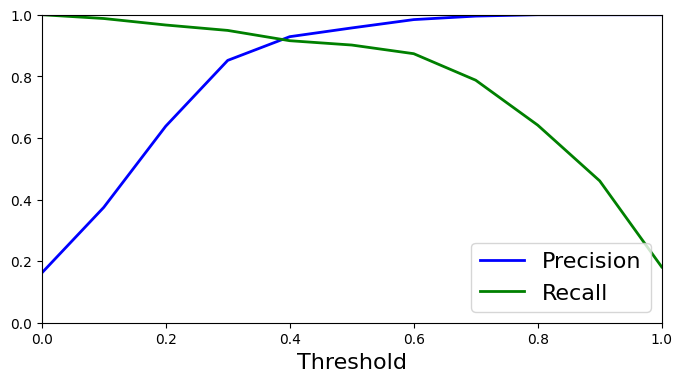

In [83]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b-", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="lower right", fontsize=16)
    plt.ylim([0, 1])
    
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([0, 1])
plt.show()


A présent nous allons confronter graphiquement la précision et le rappel, qui est une autre façon de trouver un seuil approprié. 

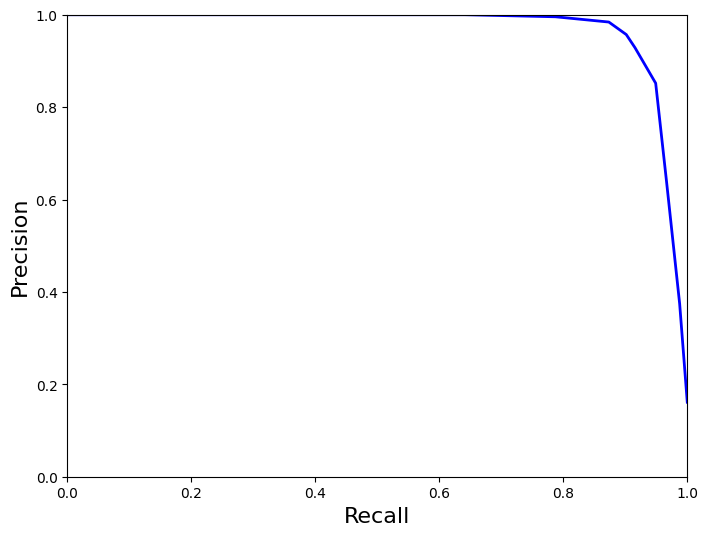

In [84]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()


Nous pouvons voir que la précision commence à chuter brutalement aux environs de 95% de rappel. 

### Courbe ROC:

La courbe ROC est un graphique qui permet de visualiser la qualité d'un modèle de classification binaire.
Nous l'utiliserons donc pour comparer la qualité des modèles que nous utiliserons afin de définir lequel est le plus pertinent.

l'objectif est d'avoir une courbe qui se rapproche le plus possible du coin supérieur gauche du graphique. Cela signifie que le modèle est capable de bien prédire les données.

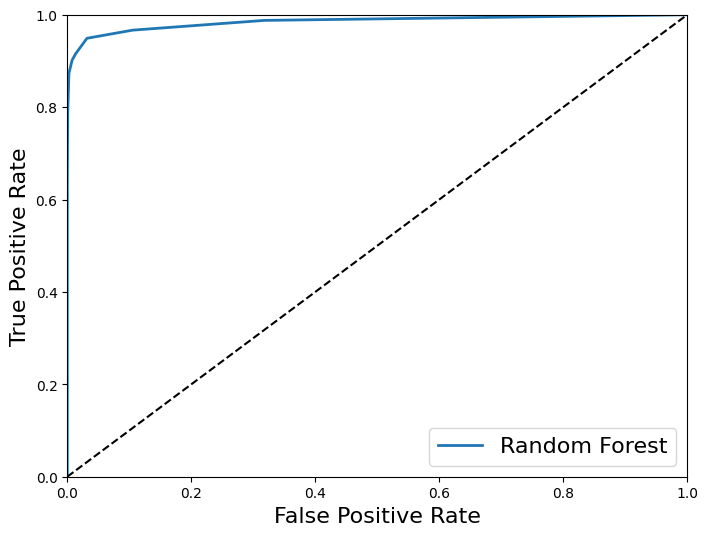

In [85]:
fpr_forest, tpr_forest, thresholds = roc_curve(y_train_1, y_scores_forest)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

Nous pouvons ensuite calculer l'aire sous la courbe (Area Under the Curve ou AUC). Un score approchant de 1 signifie que notre modèle atteint une performance optimale pour le projet.

In [86]:
roc_auc_score(y_train_1, y_scores_forest)

0.9849851900994909

## 2ème modèle : Perceptron

Nous allons maintenant entrainer un deuxième modèle sur les données d'entrainement.

Le perceptron est un modèle de réseau de neurones artificiels très simple, qui est utilisé pour la classification binaire. Il est composé d'une seule couche de neurones, qui sont tous connectés à l'entrée, et chacun de ces neurones est associé à un poids, qui est ajusté pendant l'entrainement du modèle. Le modèle de perceptron est entrainé à prédire la classe d'une donnée en utilisant une fonction d'activation, qui est une fonction qui prend en entrée la somme pondérée des entrées du modèle, et qui renvoie la prédiction du modèle. La fonction d'activation utilisée par le perceptron est la fonction échelon, qui renvoie 1 si la somme pondérée des entrées est supérieure à un seuil, et 0 sinon. Le modèle de perceptron est entrainé en ajustant les poids des neurones pour minimiser l'erreur de prédiction du modèle.


In [87]:
# Perceptron Model
perceptron_clf = Perceptron(random_state=42)

perceptron_scores = cross_val_predict(perceptron_clf, X_train_prepared, y_train_1, cv=10)

### Martrice de confusion

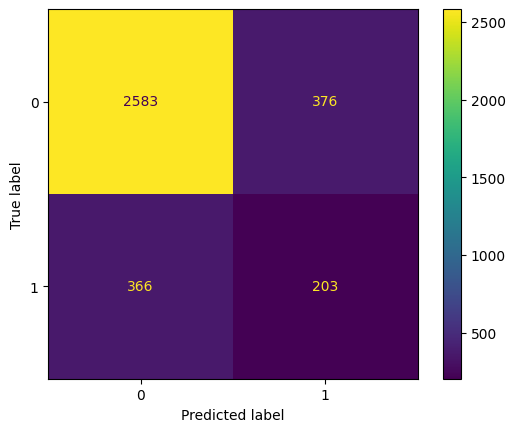

In [88]:
conf_matrix = confusion_matrix(y_train_1, perceptron_scores)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

disp.plot()


In [89]:
# Precision, Recall and F1 Score

perceptron_precision = precision_score(y_train_1, perceptron_scores)
perceptron_recall = recall_score(y_train_1, perceptron_scores)
perceptron_f1 = f1_score(y_train_1, perceptron_scores)

print(f'Precision: {perceptron_precision}')
print(f'Recall: {perceptron_recall}')
print(f'F1 Score: {perceptron_f1}')

Precision: 0.35060449050086356
Recall: 0.35676625659050965
F1 Score: 0.35365853658536583


In [90]:
y_scores_perceptron = cross_val_predict(perceptron_clf, X_train_prepared, y_train_1, cv=10, method="decision_function")

precisions_p, recalls_p, thresholds_p = precision_recall_curve(y_train_1, y_scores_perceptron)

A présent nous allons faire nos deux graphiques afin de trouver un seuil optimal.

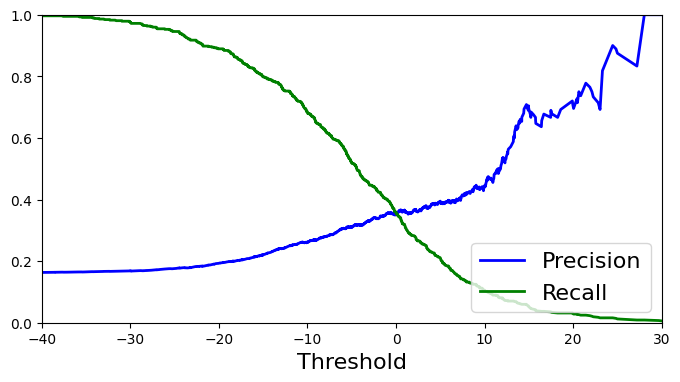

In [91]:
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions_p, recalls_p, thresholds_p)
plt.xlim([-40, 30])
plt.show()

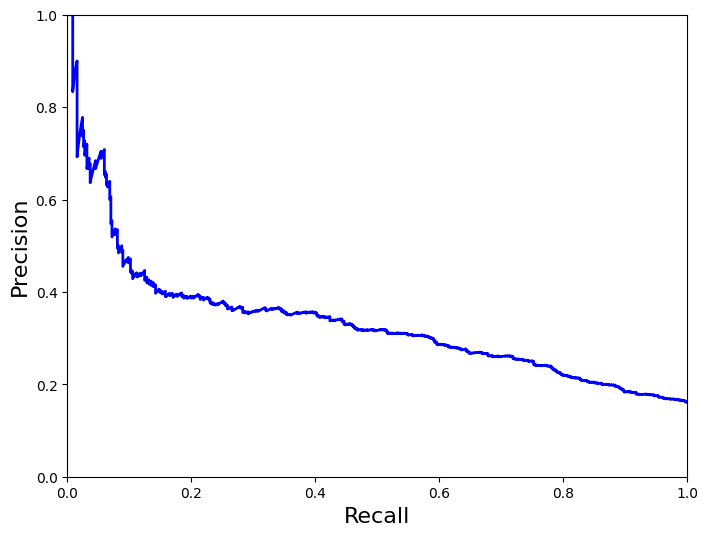

In [92]:
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions_p, recalls_p)
plt.show()

Nous pouvons voir que ce deuxième modèle est beaucoup moins efficace que le premier, le taux de précision chute très vite par rapport au rappel.

### Courbe ROC

Nous allons à présent comparer le premier et le deuxième modèle entre eux avec la courbe ROC.

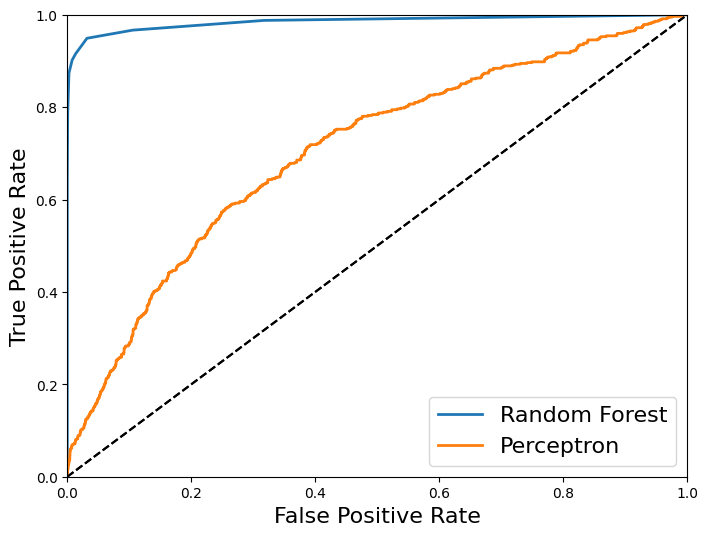

In [93]:
# ROC Curve with Random Forest Model and Perceptron Model
fpr_perceptron, tpr_perceptron, thresholds_perceptron = roc_curve(y_train_1, y_scores_perceptron)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plot_roc_curve(fpr_perceptron, tpr_perceptron, "Perceptron")
plt.legend(loc="lower right", fontsize=16)
plt.show()


In [94]:
roc_auc_score(y_train_1, y_scores_perceptron)

0.7044957120482565

Sans surprise le Perceptron est beaucoup moins intéressant pour notre projet que le Random Forest.

### 3ème modèle : Descente de gradient stochastique

Nous allons entrainer un dernier modèle sur les données d'entrainement, afin de comparer les performances de chaque modèle.
Ce modèle est la descente de gradient stochastique. 

La descente de gradient stochastique (SGD pour Stochastic Gradient Descent en anglais) est une méthode d'optimisation utilisée principalement pour la minimisation d'une fonction de coût dans le contexte de l'apprentissage automatique, notamment pour l'entraînement de modèles de régression ou de classification. Contrairement à la descente de gradient traditionnelle, qui utilise l'ensemble des données pour faire une mise à jour des paramètres à chaque itération, la SGD met à jour les paramètres pour chaque exemple d'entraînement individuellement ou par petits lots (mini-batch).


La formule pour la mise à jour des paramètres lors de l'utilisation de SGD est:

$$
\theta_{\text{n+1}} = \theta_{\text{n}} - \alpha \cdot \nabla_{\theta} J(\theta; x^{(i)}, y^{(i)})
$$

où:
- $\theta$ représente les paramètres du modèle.
- $J(\theta; x^{(i)}, y^{(i)})$ est la fonction de coût calculée pour un seul exemple $x^{(i)}$ avec sa cible associée $y^{(i)}$.
- $\nabla_{\theta} J(\theta; x^{(i)}, y^{(i)})$ est le gradient de la fonction de coût calculé pour cet exemple.
- $\alpha$ est le taux d'apprentissage.

Cette méthode est particulièrement utile pour les grands ensembles de données, car elle permet d'accélérer les calculs en réduisant la quantité de données utilisées pour calculer le gradient à chaque étape.


La descente de gradient stochastique est rapide et efficace pour les grands ensembles de données, grâce à ses mises à jour immédiates qui accélèrent l'apprentissage et sa capacité à éviter les minima locaux, favorisant la convergence vers de bonnes solutions dans des contextes complexes. Cependant, sa convergence peut être instable et est très sensible aux choix des hyperparamètres. La nécessité de diminuer progressivement le taux d'apprentissage ajoute une complexité supplémentaire, rendant l'optimisation plus délicate à maîtriser.

Nous allons donc mettre en place cette dernière méthode pour comparer son efficacité avec les méthodes précédentes.

In [95]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_prepared, y_train_1)

y_train_pred = cross_val_predict(sgd_clf, X_train_prepared, y_train_1, cv=10)

### Martrice de confusion

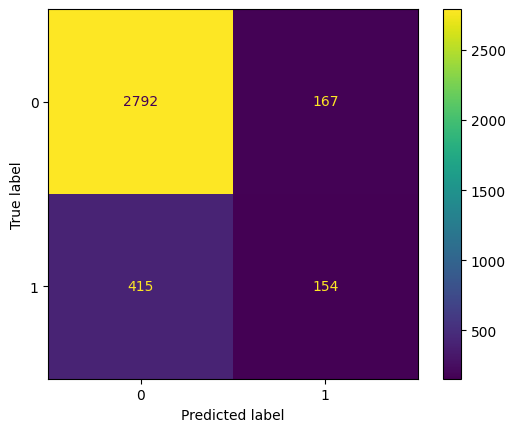

In [96]:
conf_matrix = confusion_matrix(y_train_1, y_train_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

disp.plot()


In [97]:
# Precision, Recall and F1 Score

sgd_precision = precision_score(y_train_1, y_train_pred)
sgd_recall = recall_score(y_train_1, y_train_pred)
sgd_f1 = f1_score(y_train_1, y_train_pred)

print(f'Precision: {sgd_precision}')
print(f'Recall: {sgd_recall}')
print(f'F1 Score: {sgd_f1}')


Precision: 0.4797507788161994
Recall: 0.27065026362038663
F1 Score: 0.34606741573033706


In [98]:
y_train_scores = cross_val_predict(sgd_clf, X_train_prepared, y_train_1, cv=10, method="decision_function")
precisions_binary,recalls_binary, thresholds_binary = precision_recall_curve(y_train_1, y_train_scores)

Comme précédemment, nous allons faire nos deux graphiques afin de comparer la précision et le rappel.

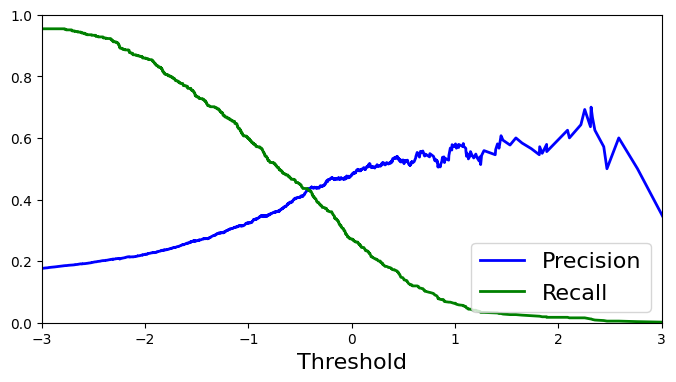

In [99]:
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions_binary, recalls_binary, thresholds_binary)
plt.xlim([-3, 3])
plt.show()


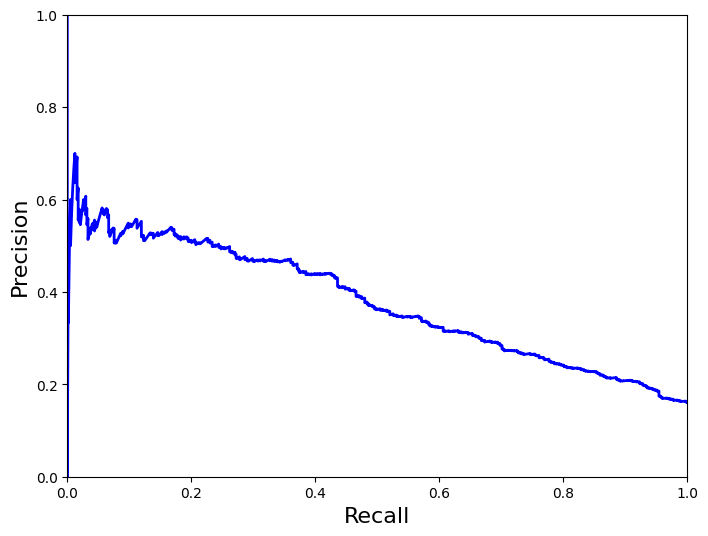

In [100]:
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions_binary, recalls_binary)
plt.show()


Ce modèle semble un peu meilleur que le Perceptron, même s'il est toujours moins bon que le Random Forest. Sur le deuxième graphique nous pouvons voir que la précision décroit de manière constante, il est plus difficile d'établir un seuil précis.

### Courbe ROC

Nous allons à présent comparer nos trois modèles afin de retenir le meilleur pour l'optimiser.

In [101]:
fpr_binary, tpr_binary, thresholds_binary = roc_curve(y_train_1, y_train_scores)

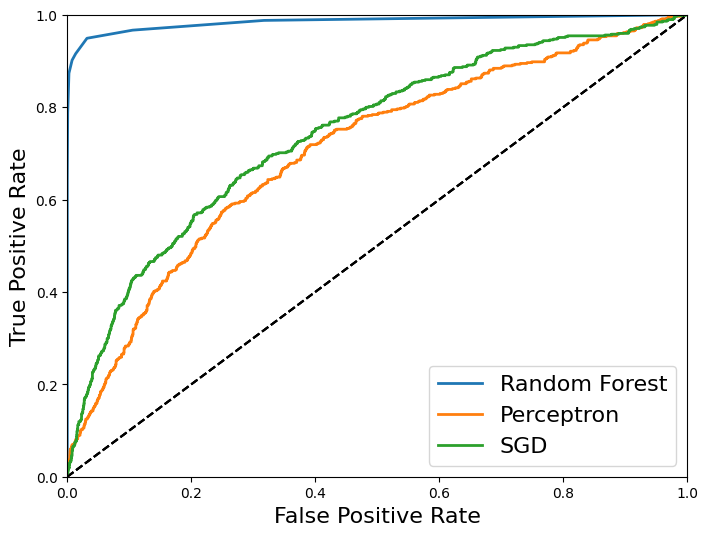

In [102]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plot_roc_curve(fpr_perceptron, tpr_perceptron, "Perceptron")
plot_roc_curve(fpr_binary, tpr_binary, "SGD")
plt.legend(loc="lower right", fontsize=16)
plt.show()


In [103]:
roc_auc_score(y_train_1, y_train_scores)

0.742465719252752

Comme nous avons pu le voir, la descente de gradient stochastique est un peu meilleure par rapport au Perceptron, mais elle reste bien moins précise par rapport au Random Forest.

## Optimisation du meilleur modèle

Nous allons maintenant optimiser le meilleur modèle que nous avons obtenu.

En effet, nous avons obtenu de bons résultats avec le modèle de Random Forest, comparé aux deux autres modèles, mais nous allons essayer de l'optimiser pour obtenir de meilleurs résultats.

Nous allons utiliser la méthode de GridSearchCV pour optimiser les hyperparamètres du modèle.

In [104]:
param_grid = [
    {
        'bootstrap': [False, True],
        'n_estimators': [3, 10, 30], 
        'max_features': [2, 4, 6, 8],
        'max_depth': [3, 10, 40, 70, 100],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10]
    }
]

grid_search = GridSearchCV(forest_clf, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train_prepared, y_train)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=10, random_state=42),
             param_grid=[{'bootstrap': [False, True],
                          'max_depth': [3, 10, 40, 70, 100],
                          'max_features': [2, 4, 6, 8],
                          'min_samples_leaf': [1, 2, 4],
                          'min_samples_split': [2, 5, 10],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [105]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 40,
 'max_features': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 30}

> **Remarque** : Nous avons obtenu des premières valeurs pour les hyper-paramètres. Nous pourrion utiliser ces valeurs dans notre modèle. Cependant, nous avons décidé de chercher des valeurs plus précises pour les hyper-paramètres, afin d'obtenir des résultats plus précis.
 
Il semble pertinent de chercher des hyperparamètres aux alentours de ces valeurs pour les améliorer.

Pour chercher des valeurs dans un intervalle, nous utilisons la méthode de RandomizedSearchCV qui permet de chercher des valeurs aléatoires dans un intervalle donné.


In [106]:
param_grid = [
    {
        'bootstrap': [False],
        'n_estimators': randint(low=7, high=13),
        'max_features': randint(low=3, high=5),
        'max_depth': randint(low=20, high=60),
        'min_samples_leaf': [1],
        'min_samples_split': [2]
    }
]

rdm_search = RandomizedSearchCV(forest_clf, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
rdm_search.fit(X_train_prepared, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_estimators=10,
                                                    random_state=42),
                   param_distributions=[{'bootstrap': [False],
                                         'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D4AD22FD00>,
                                         'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D4AD22EE30>,
                                         'min_samples_leaf': [1],
                                         'min_samples_split': [2],
                                         'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D4AD22DA80>}],
                   return_train_score=True, scoring='neg_mean_squared_error')

In [107]:
rdm_search.best_params_

{'bootstrap': False,
 'max_depth': 22,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 12}

Grace à RandomizedSearchCV, nous avons pu trouver les paramètres optimaux pour notre modèle.

A présent, nous pouvons lister l'importance des features pour notre modèle, et donc déterminer les features les plus importantes pour prédire le départ d'un employé.



In [108]:
feature_importances = rdm_search.best_estimator_.feature_importances_

# Displaying the feature importances
attributes = num_attribs.tolist() + cat_attribs.tolist()
sorted(zip(feature_importances, attributes), reverse=True)


[(0.10906034090662386, 'Age'),
 (0.08580898049988561, 'YearsWithCurrManager'),
 (0.07768707214218527, 'PercentSalaryHike'),
 (0.06067487764199084, 'NumCompaniesWorked'),
 (0.05232359164757467, 'Education'),
 (0.05159806524943123, 'EnvironmentSatisfaction'),
 (0.051160075469455675, 'TrainingTimesLastYear'),
 (0.04485902006400532, 'JobSatisfaction'),
 (0.04336835913209489, 'JobLevel'),
 (0.04287153283060274, 'WorkLifeBalance'),
 (0.03869560959299458, 'StockOptionLevel'),
 (0.018525262783857657, 'AverageTimeSpent'),
 (0.01835853964602982, 'Department'),
 (0.015723766268559296, 'JobRole'),
 (0.011151854508260168, 'MonthlyIncome'),
 (0.010004913899946918, 'BusinessTravel')]

Nous constatons que les features les plus importantes pour prédire le départ d'un employé, avec prendre en compte la partie éthique sont :
- *Age*
- *YearsWithCurrManager*
- *PercentSalaryHike*

### Evaluation du modèle optimisé sur le jeu de test

Pour finir, nous allons évaluer le modèle optimisé sur le jeu de test, et vérifier que les résultats sont toujours satisfaisants.

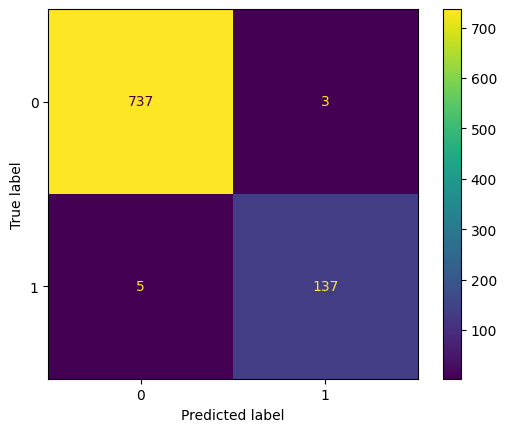

In [109]:
final_model = rdm_search.best_estimator_

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_confMatrix = confusion_matrix(y_test, final_predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=final_confMatrix)

disp.plot()


In [110]:
final_precision = precision_score(y_test, final_predictions)
final_recall = recall_score(y_test, final_predictions)
final_f1 = f1_score(y_test, final_predictions)

print(f'Precision: {final_precision}')
print(f'Recall: {final_recall}')
print(f'F1 Score: {final_f1}')

Precision: 0.9785714285714285
Recall: 0.9647887323943662
F1 Score: 0.9716312056737588


## Conclusion

Nous constatons que nous avons de très bons résultats pour notre modèle optimisé.

Nous sommes donc capable de prédire le départ d'un employé avec une très grande précision.

Cependant, il est important de noter que nous avons un jeu de données assez petit, et que les résultats pourraient être différents sur un jeu de données plus grand.

De plus, il est possible que le modèle soir sur-entrainé, et donc qu'il ne soit pas capable de prédire correctement les données d'un autre jeu de données, car si le modèle possède un F1-score aussi proche de 1,0, cela signifie que nous devrions être capable de prédire toutes les données correctement, ce qui est en réalité très peu probable.

Il est donc important de prendre ces résultats avec des pincettes, et de les vérifier sur un jeu de données plus grand.